In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import yfinance as yf
import tensorflow
import keras

In [6]:
amzn = yf.download('AMZN', start='2022-01-01', end='2023-06-17', progress=False)

In [8]:
amzn.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,167.550003,170.703506,166.160507,170.404495,170.404495,63520000
2022-01-04,170.438004,171.399994,166.349503,167.522003,167.522003,70726000
2022-01-05,166.882996,167.126495,164.356995,164.356995,164.356995,64302000


In [9]:
amzn = amzn.drop(columns=['Adj Close'])

In [10]:
amzn.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2022-01-03,167.550003,170.703506,166.160507,170.404495,63520000
2022-01-04,170.438004,171.399994,166.349503,167.522003,70726000
2022-01-05,166.882996,167.126495,164.356995,164.356995,64302000


In [11]:
amzn.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [12]:
amzn.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2022-01-03 to 2023-06-16
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    366 non-null    float64
 1   High    366 non-null    float64
 2   Low     366 non-null    float64
 3   Close   366 non-null    float64
 4   Volume  366 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 17.2 KB


In [13]:
amzn.to_csv('amzn_export.csv')

Text(0, 0.5, 'Historic Prices')

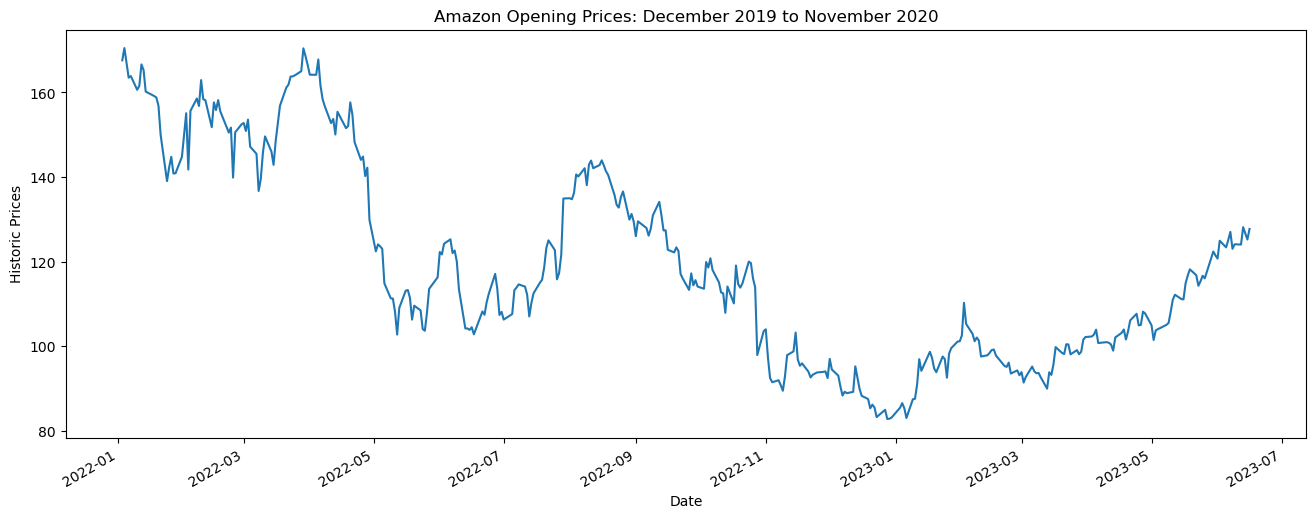

In [14]:
amzn['Open'].plot(figsize=(16,6))
plt.title('Amazon Opening Prices: December 2019 to November 2020')
plt.xlabel('Date')
plt.ylabel('Historic Prices')

In [15]:
amzn.rolling(7).mean().head(20)

,Open,High,Low,Close,Volume
Date,,,,,
2022-01-03,NaN,NaN,NaN,NaN,NaN
2022-01-04,NaN,NaN,NaN,NaN,NaN
2022-01-05,NaN,NaN,NaN,NaN,NaN
2022-01-06,NaN,NaN,NaN,NaN,NaN
2022-01-07,NaN,NaN,NaN,NaN,NaN
2022-01-10,NaN,NaN,NaN,NaN,NaN
2022-01-11,164.892286,166.755001,162.548717,164.991355,6.395943e+07
2022-01-12,164.752999,166.208500,162.299646,164.248856,6.203229e+07
2022-01-13,164.011928,165.468715,161.548431,163.347713,5.938400e+07


Text(0, 0.5, 'Historic Price')

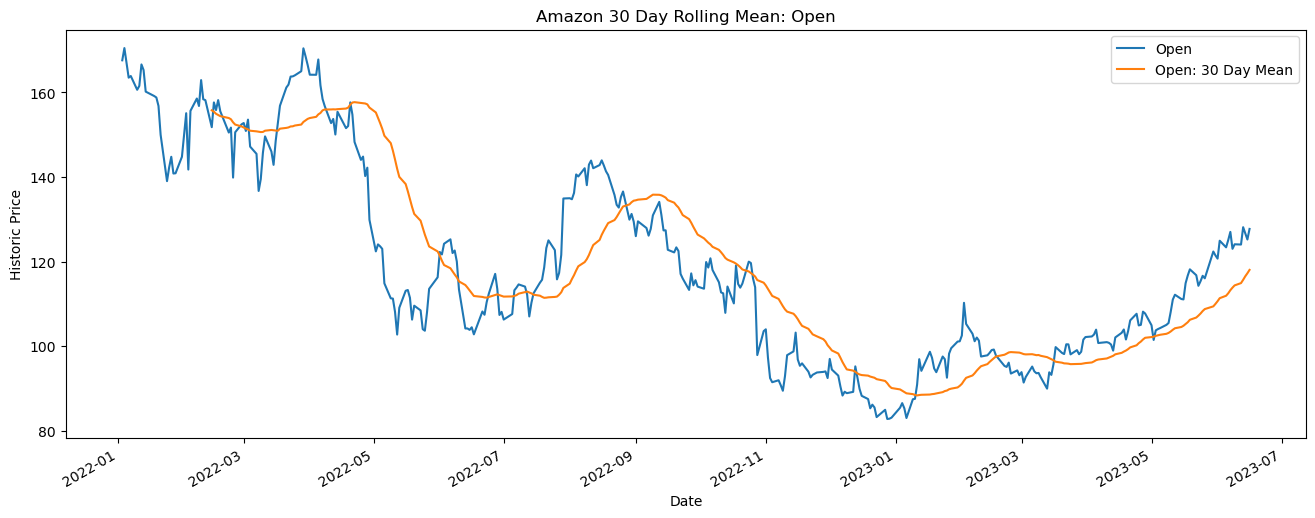

In [16]:
amzn['Open: 30 Day Mean'] = amzn['Open'].rolling(window=30).mean()
amzn[['Open','Open: 30 Day Mean']].plot(figsize=(16,6))
plt.title('Amazon 30 Day Rolling Mean: Open')
plt.ylabel('Historic Price')

Text(0, 0.5, 'Historic Price')

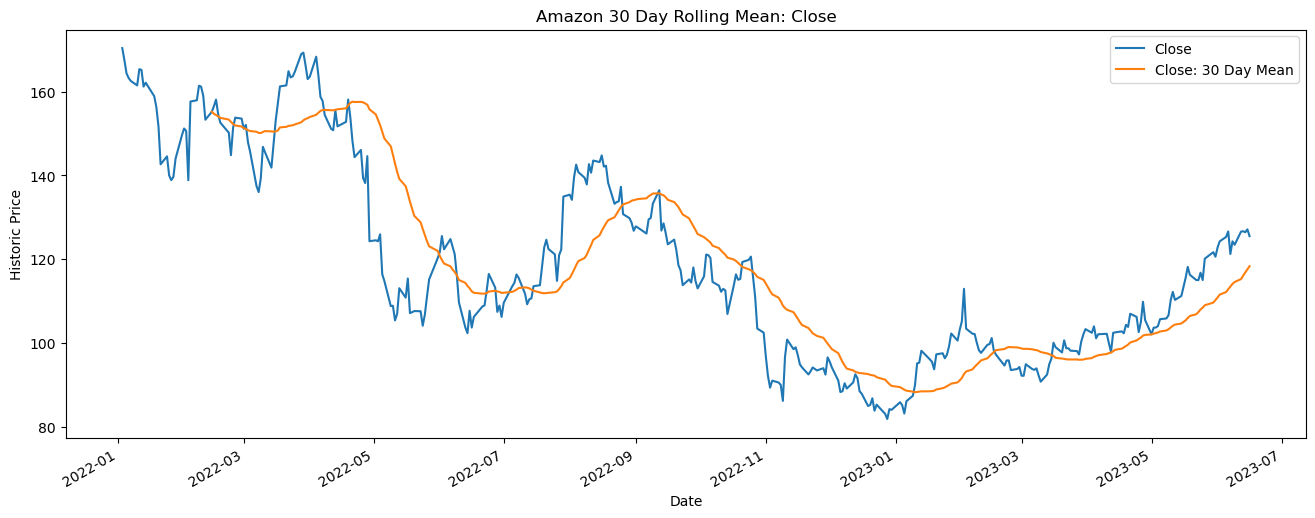

In [17]:
amzn['Close: 30 Day Mean'] = amzn['Close'].rolling(window=30).mean()
amzn[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))
plt.title('Amazon 30 Day Rolling Mean: Close')
plt.ylabel('Historic Price')

In [18]:
amzn_training_set = amzn['Close']
amzn_training_set = pd.DataFrame(amzn_training_set)

In [19]:
from sklearn.preprocessing import MinMaxScaler
amzn_scale = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = amzn_scale.fit_transform(amzn_training_set)

In [20]:
X_train = []
y_train = []
for i in range(30, 223):
    X_train.append(training_set_scaled[i-30:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [22]:
regressor = Sequential()

In [23]:
# Adding the first LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

In [24]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 250, batch_size = 96)

Epoch 1/250
3/3 [==============================] - 9s 86ms/step - loss: 0.2832
Epoch 2/250
3/3 [==============================] - 0s 77ms/step - loss: 0.1090
Epoch 3/250
3/3 [==============================] - 0s 77ms/step - loss: 0.0649
Epoch 4/250
3/3 [==============================] - 0s 78ms/step - loss: 0.0424
Epoch 5/250
3/3 [==============================] - 0s 80ms/step - loss: 0.0433
Epoch 6/250
3/3 [==============================] - 0s 126ms/step - loss: 0.0499
Epoch 7/250
3/3 [==============================] - 0s 80ms/step - loss: 0.0347
Epoch 8/250
3/3 [==============================] - 0s 81ms/step - loss: 0.0399
Epoch 9/250
3/3 [==============================] - 0s 79ms/step - loss: 0.0430
Epoch 10/250
3/3 [==============================] - 0s 78ms/step - loss: 0.0362
Epoch 11/250
3/3 [==============================] - 0s 80ms/step - loss: 0.0553
Epoch 12/250
3/3 [==============================] - 0s 79ms/step - loss: 0.0631
Epoch 13/250
3/3 [==============================

3/3 [==============================] - 0s 98ms/step - loss: 0.0186
Epoch 104/250
3/3 [==============================] - 0s 90ms/step - loss: 0.0163
Epoch 105/250
3/3 [==============================] - 0s 89ms/step - loss: 0.0172
Epoch 106/250
3/3 [==============================] - 0s 80ms/step - loss: 0.0195
Epoch 107/250
3/3 [==============================] - 0s 83ms/step - loss: 0.0228
Epoch 108/250
3/3 [==============================] - 0s 103ms/step - loss: 0.0178
Epoch 109/250
3/3 [==============================] - 0s 129ms/step - loss: 0.0136
Epoch 110/250
3/3 [==============================] - 0s 79ms/step - loss: 0.0160
Epoch 111/250
3/3 [==============================] - 0s 79ms/step - loss: 0.0149
Epoch 112/250
3/3 [==============================] - 0s 77ms/step - loss: 0.0162
Epoch 113/250
3/3 [==============================] - 0s 76ms/step - loss: 0.0138
Epoch 114/250
3/3 [==============================] - 0s 94ms/step - loss: 0.0127
Epoch 115/250
3/3 [=====================

Epoch 204/250
3/3 [==============================] - 0s 81ms/step - loss: 0.0154
Epoch 205/250
3/3 [==============================] - 0s 78ms/step - loss: 0.0151
Epoch 206/250
3/3 [==============================] - 0s 85ms/step - loss: 0.0151
Epoch 207/250
3/3 [==============================] - 0s 83ms/step - loss: 0.0110
Epoch 208/250
3/3 [==============================] - 0s 82ms/step - loss: 0.0128
Epoch 209/250
3/3 [==============================] - 0s 90ms/step - loss: 0.0125
Epoch 210/250
3/3 [==============================] - 0s 85ms/step - loss: 0.0119
Epoch 211/250
3/3 [==============================] - 0s 82ms/step - loss: 0.0126
Epoch 212/250
3/3 [==============================] - 0s 83ms/step - loss: 0.0130
Epoch 213/250
3/3 [==============================] - 0s 86ms/step - loss: 0.0131
Epoch 214/250
3/3 [==============================] - 0s 82ms/step - loss: 0.0126
Epoch 215/250
3/3 [==============================] - 0s 80ms/step - loss: 0.0148
Epoch 216/250
3/3 [=========

In [26]:
amzn_test = pd.read_csv('amzn_export.csv', index_col = 'Date', parse_dates=True)

In [27]:
amzn_test.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2022-01-03,167.550003,170.703506,166.160507,170.404495,63520000
2022-01-04,170.438004,171.399994,166.349503,167.522003,70726000
2022-01-05,166.882996,167.126495,164.356995,164.356995,64302000


In [28]:
real_prc_amzn = amzn_test.iloc[:, 1:2].values

In [29]:
amzn_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2022-01-03 to 2023-06-16
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    366 non-null    float64
 1   High    366 non-null    float64
 2   Low     366 non-null    float64
 3   Close   366 non-null    float64
 4   Volume  366 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 17.2 KB


In [30]:
amzn_test['Volume'] = amzn_test['Volume'].astype(float)

In [31]:
amzn_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2022-01-03 to 2023-06-16
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    366 non-null    float64
 1   High    366 non-null    float64
 2   Low     366 non-null    float64
 3   Close   366 non-null    float64
 4   Volume  366 non-null    float64
dtypes: float64(5)
memory usage: 17.2 KB


In [32]:
test_set=amzn_test['Open']
test_set=pd.DataFrame(test_set)

In [33]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2022-01-03 to 2023-06-16
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    366 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [34]:
amzn_total = pd.concat((amzn['Open'], amzn_test['Open']), axis = 0)
inputs = amzn_total[len(amzn_total) - len(amzn_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = amzn_scale.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = amzn_scale.inverse_transform(predicted_stock_price)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


ValueError: in user code:

    File "C:\Users\HP\anaconda3\lib\site-packages\keras\engine\training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\HP\anaconda3\lib\site-packages\keras\engine\training.py", line 1834, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\HP\anaconda3\lib\site-packages\keras\engine\training.py", line 1823, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\HP\anaconda3\lib\site-packages\keras\engine\training.py", line 1791, in predict_step
        return self(x, training=False)
    File "C:\Users\HP\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\HP\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 30, 1), found shape=(None, 60, 1)


In [191]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20 non-null     float32
dtypes: float32(1)
memory usage: 208.0 bytes


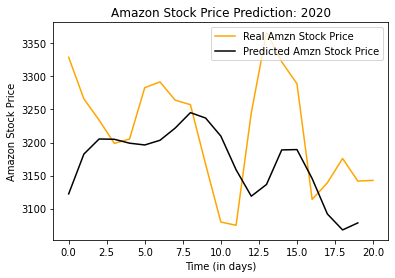

In [197]:
plt.plot(real_prc_amzn, color = 'orange', label = 'Real Amzn Stock Price')
plt.plot(predicted_stock_price, color = 'black', label = 'Predicted Amzn Stock Price')
plt.title('Amazon Stock Price Prediction: 2020')
plt.xlabel('Time (in days)')
plt.ylabel('Amazon Stock Price')
plt.legend()
plt.show()